[reference](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks)

![confusion matrix](confusion-matrix.png)

### Review
- obs compress -> model (much smaller than obs)
- model -> predictions

- unsup, obs is unlabled -> clusterings, kMean
- time series, obs is time related data (order dependent) - cross correlation (shift), auto correclation. prophet good for strong trend and seasonality. 


### sup-learning: 
- obs is labeled data(X (1000, 10), y(1000, 1)) obs is in the shape of (1000, 11) 11 columns, F or N 1 -> (1000, 10) X and (1000, 1) y
- y = f(X) our task is to find the proper f. we will provide basic structure of the 'f', NN, SVM, DT 
- if 'y' is continuous, 'f' structure linear regression. if the 'y' is discrete. 'f' structure will be something logistic regression, SVM, DT

### Linear Regression


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

#### Data Loading and Visualization

In [7]:
# Read salary data
file_path = Path("Resources/salary_data.csv")
df_salary = pd.read_csv(file_path)

# Display sample data
df_salary.head()

,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
# y = f(X) X(30,1) y(30,1)


In [4]:
# Create a scatter plot with the salary information
salary_plot = df_salary.hvplot.scatter(
    x="years_experience",
    y="salary",
    title="Expected Salary Based on Years of Experience"
)
salary_plot

:Scatter   [years_experience]   (salary)

#### Data Preparation



In [ ]:
X = df_salary["years_experience"].values.reshape(-1,1)
X.shape
X

In [ ]:
y = df_salary['salary'].values.reshape(-1,1)
y

#### Building the Linear Regression Model

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

#### Linear Regression Model Assessment

In [22]:
print(model.coef_)
print(model.intercept_)

# coef_ (1,1) 
# intercept_
# y = f(X) => f -> X @ a + b + e
# X (30,1) (1,1) -> (30,1)  y (30,1)

[[9449.96232146]]
[25792.20019867]


In [25]:
# Import relevant metrics - score, r2, mse, rmse, std - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

predicted_y_values = model.predict(X)


In [28]:
# Create a copy of the original data
df_salary_predicted = df_salary.copy()

# Add a column with the predicted salary values
df_salary_predicted["salary_predicted"] = predicted_y_values

# Display sample data
# df_salary_predicted.head()


best_fit_line = df_salary_predicted.hvplot.line(
    x = "years_experience",
    y = "salary_predicted",
    color = "red"
)
best_fit_line * salary_plot

:Overlay
   .Curve.I   :Curve   [years_experience]   (salary_predicted)
   .Scatter.I :Scatter   [years_experience]   (salary)

In [31]:
# Compute the metrics for the linear regression model
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")

print(f"The root mean squared error is {rmse}.")


The score is 0.9569566641435086.
The r2 is 0.9569566641435086.
The root mean squared error is 5592.043608760662.


 ### Logistic Regression
- [model structure](https://en.wikipedia.org/wiki/Logistic_regression) 

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

 #### Generate some data

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


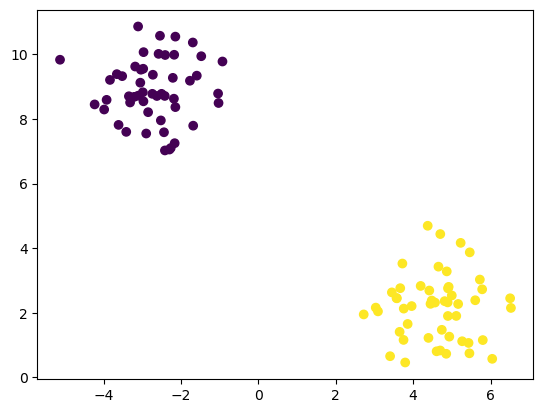

In [34]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

 #### Split our data into training and testing

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
len(X_train)

75

 #### Create a Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

 #### Fit (train) or model using the training data

In [41]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

 ### Validate the model using the test data

In [42]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


#### Make predictions

In [43]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


#### Calculate the Accuracy Score

In [44]:
from sklearn.metrics import accuracy_score

#### Make a Prediction on a New Single Data Point

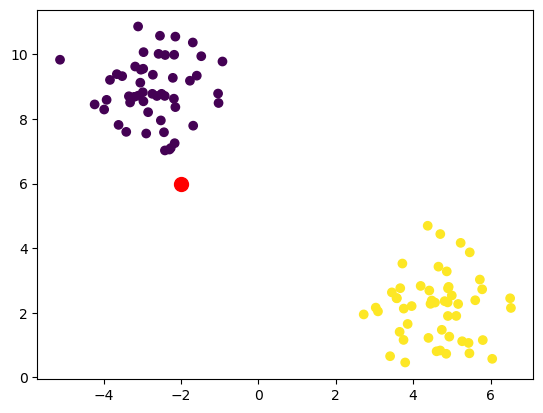

In [45]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [46]:
# Predict the class (purple or yellow) of the new data point
new_prediction = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {new_prediction}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


### confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

### Generate some data

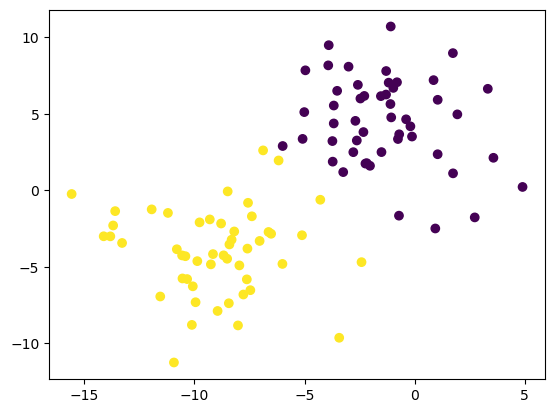

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=1, cluster_std=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [48]:
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


 #### Confusion Matrix


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11,  1],
       [ 0, 13]])

 #### Classification Report

In [50]:
from sklearn.metrics import classification_report
target_names = ["Class Purple", "Class Yellow"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

Class Purple       1.00      0.92      0.96        12
Class Yellow       0.93      1.00      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

